# Atlanta Police Department
![APD Logo](https://atlantapd.galls.com/photos/partners/atlantapd/logo.jpg)


The Atlanta Police Department provides Part 1 crime data at http://www.atlantapd.org/i-want-to/crime-data-downloads

A recent copy of the data file is stored in the cluster. <span style="color: red; font-weight: bold;">Please, do not copy this data file into your home directory!</span>

# Introduction


- This notebooks leads into an exploration of public crime data provided by the Atlanta Police Department.
- The original data set and supplemental information can be found at http://www.atlantapd.org/i-want-to/crime-data-downloads
- **The data set is available on ARC, please, don't download into your home directory on ARC!**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
ls -l /home/data/APD/COBRA-YTD*.xlsx

-rw-r--r-- 1 pmolnar data 6113160 Oct  4 17:15 /home/data/APD/COBRA-YTD2009.xlsx
-rw-r--r-- 1 pmolnar data 5528521 Oct  4 17:15 /home/data/APD/COBRA-YTD2010.xlsx
-rw-r--r-- 1 pmolnar data 5432924 Oct  4 17:15 /home/data/APD/COBRA-YTD2011.xlsx
-rw-r--r-- 1 pmolnar data 5128046 Oct  4 17:15 /home/data/APD/COBRA-YTD2012.xlsx
-rw-r--r-- 1 pmolnar data 4972005 Oct  4 17:15 /home/data/APD/COBRA-YTD2013.xlsx
-rw-r--r-- 1 pmolnar data 4804222 Oct  4 17:15 /home/data/APD/COBRA-YTD2014.xlsx
-rw-r--r-- 1 pmolnar data 4640184 Oct  4 17:15 /home/data/APD/COBRA-YTD2015.xlsx
-rw-r--r-- 1 pmolnar data 3931468 Oct  4 17:15 /home/data/APD/COBRA-YTD2016.xlsx
-rw-r--r-- 1 pmolnar data 2962620 Oct  4 17:15 /home/data/APD/COBRA-YTD2017.xlsx


In [10]:
# load data set
df2017 = pd.read_excel('/home/data/APD/COBRA-YTD2017.xlsx', sheetname='Query')
print "Shape of table: ", df2017.shape
print df2017.offense_id.min(), df2017.offense_id.max()

Shape of table:  (19073, 23)


In [14]:
df2016 = pd.read_excel('/home/data/APD/COBRA-YTD2016.xlsx', sheetname='Query')
print "Shape of table: ", df2016.shape
print df2016.offense_id.min(), df2016.offense_id.max()

Shape of table:  (19073, 23)
150102493 163660563113


In [13]:
df2015 = pd.read_excel('/home/data/APD/COBRA-YTD2015.xlsx', sheetname='Query')
print "Shape of table: ", df2015.shape
print df2015.offense_id.min(), df2015.offense_id.max()

(150102493, 163660563113)

In [ ]:
df2014 = pd.read_excel('/home/data/APD/COBRA-YTD2014.xlsx', sheetname='Query')
print "Shape of table: ", df2014.shape
print df2015.offense_id.min(), df2015.offense_id.max()

In [15]:
dfd = dict()
for YY in [9, 10, 11, 12, 13, 14, 15, 16, 17]:
    dfd[YY] = pd.read_excel('/home/data/APD/COBRA-YTD20%02d.xlsx'%YY, sheetname='Query')
    print YY
    print "Shape of table: ", dfd[YY].shape
    print dfd[YY].offense_id.min(), dfd[YY].offense_id.max()
    print "-----"

9
Shape of table:  (39626, 23)
82040835 93611412081
-----
10
Shape of table:  (35770, 23)
72692336 103601083093
-----
11
Shape of table:  (35174, 23)
100020717 113642157089
-----
12
Shape of table:  (33394, 23)
110171050 123610998085
-----
13
Shape of table:  (32303, 23)
111290429 133641638086
-----
14
Shape of table:  (31166, 23)
120140510 143590367094
-----
15
Shape of table:  (30115, 23)
140041432 153600498099
-----
16
Shape of table:  (29112, 23)
150102493 163660563113
-----
17
Shape of table:  (19073, 23)
160821939 172640598057
-----


Let's look at the structure of this table. We're actually creating some text output that can be used to create a data dictionary.

In [19]:
pd.concat([dfd[17], dfd[16]]).shape

(48185, 23)

In [25]:
df = pd.concat([dfd[k] for k in dfd.keys()])

In [26]:
df.to_csv('/home/data/APD/COBRA-YTD-multiyear.csv.gz', index=None, compression='gzip')

In [28]:
pd.Series([1,2,3], index=['a', 'b', 'c']).reset_index()

,index,0
0,a,1
1,b,2
2,c,3


In [7]:
dataDict = pd.DataFrame({'DataType': df.dtypes.values, 'Description': '', }, index=df.columns.values)

We need to enter the descriptions for each entry in our dictionary manually. However, why not just create a the Python code automatically...

Run the code below only if you haven't edited the `datadict.py` file in a different way, since it will overwrite what you have so far. (That's why the code is commented-out.)

In [8]:
dataDict

,DataType,Description
MI_PRINX,int64,
offense_id,int64,
rpt_date,object,
occur_date,object,
occur_time,object,
poss_date,object,
poss_time,object,
beat,int64,
apt_office_prefix,object,
apt_office_num,object,


In [10]:
with open("datadict2.py", "w") as io:
     for i in dataDict.index:
         io.write("dataDict.loc['%s'].Description = '' # type: %s\n" % (i, str(dataDict.loc[i].DataType)))

In [11]:
ls -l datadict2.py

-rw-r--r-- 1 pmolnar pmolnar 1329 Sep 27 19:33 datadict2.py


In [14]:
# %load datadict2.py
dataDict.loc['MI_PRINX'].Description = '' # type: int64
dataDict.loc['offense_id'].Description = '' # type: int64
dataDict.loc['rpt_date'].Description = '' # type: object
dataDict.loc['occur_date'].Description = '' # type: object
dataDict.loc['occur_time'].Description = '' # type: object
dataDict.loc['poss_date'].Description = '' # type: object
dataDict.loc['poss_time'].Description = '' # type: object
dataDict.loc['beat'].Description = '' # type: int64
dataDict.loc['apt_office_prefix'].Description = '' # type: object
dataDict.loc['apt_office_num'].Description = '' # type: object
dataDict.loc['location'].Description = '' # type: object
dataDict.loc['MinOfucr'].Description = '' # type: int64
dataDict.loc['MinOfibr_code'].Description = '' # type: object
dataDict.loc['dispo_code'].Description = '' # type: object
dataDict.loc['MaxOfnum_victims'].Description = '' # type: float64
dataDict.loc['Shift'].Description = '' # type: object
dataDict.loc['Avg Day'].Description = '' # type: object
dataDict.loc['loc_type'].Description = '' # type: float64
dataDict.loc['UC2 Literal'].Description = '' # type: object
dataDict.loc['neighborhood'].Description = '' # type: object
dataDict.loc['npu'].Description = '' # type: object
dataDict.loc['x'].Description = '' # type: float64
dataDict.loc['y'].Description = '' # type: float64


In [ ]:
# %load datadict.py
dataDict.loc['MI_PRINX'].Description = '' # type: int64
dataDict.loc['offense_id'].Description = 'Unique ID in the format YYDDDNNNN with the year YY, the day of the year DDD and a counter NNNN' # type: int64
dataDict.loc['rpt_date'].Description = 'Date the crime was reported' # type: object
dataDict.loc['occur_date'].Description = 'Estimated date when the crime occured' # type: object
dataDict.loc['occur_time'].Description = 'Estimated time when the crime occured' # type: object
dataDict.loc['poss_date'].Description = '' # type: object
dataDict.loc['poss_time'].Description = '' # type: object
dataDict.loc['beat'].Description = '' # type: int64
dataDict.loc['apt_office_prefix'].Description = '' # type: object
dataDict.loc['apt_office_num'].Description = '' # type: object
dataDict.loc['location'].Description = '' # type: object
dataDict.loc['MinOfucr'].Description = '' # type: int64
dataDict.loc['MinOfibr_code'].Description = '' # type: object
dataDict.loc['dispo_code'].Description = '' # type: object
dataDict.loc['MaxOfnum_victims'].Description = '' # type: float64
dataDict.loc['Shift'].Description = 'Zones have 8 or 10 hour shifts' # type: object
dataDict.loc['Avg Day'].Description = '' # type: object
dataDict.loc['loc_type'].Description = '' # type: float64
dataDict.loc['UC2 Literal'].Description = '' # type: object
dataDict.loc['neighborhood'].Description = '' # type: object
dataDict.loc['npu'].Description = '' # type: object
dataDict.loc['x'].Description = '' # type: float64
dataDict.loc['y'].Description = '' # type: float64
dataDict.to_csv("COBRA_Data_Dictionary.csv")

In [27]:
sorted(df.npu.unique())

[nan,
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [31]:
len(df.neighborhood.unique())

235

## Fixing Data Types

In [ ]:
print df.groupby("Shift").count().index

## Date and Time
- Working with dates can be tricky. Often dates and times are coded as strings and need to be converted to a date and time data format.
- Python provides a module `datetime` to deal with converting parsing and formatting dates and times. See https://docs.python.org/2/library/datetime.html
- The `pandas` package provides functionality to convert text fields into date/time fields...given the values adhere to a given format. See http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html

### Create a proper text field
In order to use the text to date/time converter our text columns need to have the appropriate format.

In [15]:
df[['occur_date', 'occur_time']]

,occur_date,occur_time
0,09/06/2017,00:30:00
1,09/05/2017,11:15:00
2,09/06/2017,03:15:00
3,09/05/2017,17:45:00
4,09/05/2017,17:00:00
5,09/06/2017,05:30:00
6,09/06/2017,06:50:00
7,09/06/2017,06:50:00
8,09/06/2017,04:00:00
9,09/06/2017,04:00:00


In [17]:
# function currying
def fixdatetime(fld):
    def _fix(s):
        date_col = '%s_date' % fld
        time_col = '%s_time' % fld
        if time_col in s.index:
            return str(s[date_col])+' '+str(s[time_col])
        else:
            return str(s[date_col])+' 00:00:00'
    return _fix

df.apply(fixdatetime('occur'), axis=1)[:10]

0    09/06/2017 00:30:00
1    09/05/2017 11:15:00
2    09/06/2017 03:15:00
3    09/05/2017 17:45:00
4    09/05/2017 17:00:00
5    09/06/2017 05:30:00
6    09/06/2017 06:50:00
7    09/06/2017 06:50:00
8    09/06/2017 04:00:00
9    09/06/2017 04:00:00
dtype: object

### Convert Columns

In [18]:
for col in ['rpt', 'occur', 'poss']:
    datser = df.apply(fixdatetime(col), axis=1)
    df['%s_dt'%col] = pd.to_datetime(datser, format="%m/%d/%Y %H:%M:%S", errors='coerce')

In [19]:
df.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y,rpt_dt,occur_dt,poss_dt
0,7693210,172490115,09/06/2017,09/06/2017,00:30:00,09/06/2017,00:35:00,607,NaN,NaN,...,Wed,NaN,AGG ASSAULT,Custer/McDonough/Guice,W,-84.35850,33.70839,2017-09-06,2017-09-06 00:30:00,2017-09-06 00:35:00
1,7693211,172490265,09/06/2017,09/05/2017,11:15:00,09/06/2017,02:30:00,512,NaN,NaN,...,Tue,99.0,LARCENY-FROM VEHICLE,Downtown,M,-84.39736,33.74958,2017-09-06,2017-09-05 11:15:00,2017-09-06 02:30:00
2,7693212,172490322,09/06/2017,09/06/2017,03:15:00,09/06/2017,03:45:00,501,NaN,NaN,...,Wed,18.0,LARCENY-FROM VEHICLE,Atlantic Station,E,-84.39776,33.79072,2017-09-06,2017-09-06 03:15:00,2017-09-06 03:45:00
3,7693213,172490390,09/06/2017,09/05/2017,17:45:00,09/06/2017,04:57:00,207,NaN,NaN,...,Tue,18.0,LARCENY-FROM VEHICLE,Brookwood Hills,E,-84.39361,33.80774,2017-09-06,2017-09-05 17:45:00,2017-09-06 04:57:00
4,7693214,172490401,09/06/2017,09/05/2017,17:00:00,09/06/2017,05:00:00,203,NaN,NaN,...,Tue,18.0,LARCENY-FROM VEHICLE,Hills Park,D,-84.43337,33.79848,2017-09-06,2017-09-05 17:00:00,2017-09-06 05:00:00


In [20]:
df.dtypes

MI_PRINX                      int64
offense_id                    int64
rpt_date                     object
occur_date                   object
occur_time                   object
poss_date                    object
poss_time                    object
beat                          int64
apt_office_prefix            object
apt_office_num               object
location                     object
MinOfucr                      int64
MinOfibr_code                object
dispo_code                   object
MaxOfnum_victims            float64
Shift                        object
Avg Day                      object
loc_type                    float64
UC2 Literal                  object
neighborhood                 object
npu                          object
x                           float64
y                           float64
rpt_dt               datetime64[ns]
occur_dt             datetime64[ns]
poss_dt              datetime64[ns]
dtype: object

## Beats and Zones
The City of Atlanta is divided into 6 zones. Each with 12 to 14 beats. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Atlanta_Police_Zones_-_Feb_2013.jpg/588px-Atlanta_Police_Zones_-_Feb_2013.jpg)

Let's create a separate column for the zones:

In [21]:
df.beat[:10]

0    607
1    512
2    501
3    207
4    203
5    605
6    511
7    508
8    408
9    401
Name: beat, dtype: int64

In [22]:
df['Zone'] = df['beat']//100

In [23]:
df.Zone[:4]

0    6
1    5
2    5
3    2
Name: Zone, dtype: int64

In [32]:
df['UC2 Literal'].unique()

array(['AGG ASSAULT', 'LARCENY-FROM VEHICLE', 'AUTO THEFT',
       'LARCENY-NON VEHICLE', 'ROBBERY-PEDESTRIAN', 'BURGLARY-NONRES',
       'BURGLARY-RESIDENCE', 'ROBBERY-COMMERCIAL', 'RAPE',
       'ROBBERY-RESIDENCE', 'HOMICIDE'], dtype=object)

In [ ]:
##df[df['UC2 Literal']=='LARCENY-FROM VEHICLE']

In [37]:
df.occur_date.min(), df.occur_date.max()

('01/01/2008', '12/31/2016')

In [43]:
df['Year'] = df.rpt_dt.map(lambda d: d.year)

In [44]:
df.groupby('Year').offense_id.count()

Year
2017    17425
Name: offense_id, dtype: int64

In [63]:
brdf = df[df['UC2 Literal']=='BURGLARY-RESIDENCE'].copy()

In [50]:
brdf.shape, df.shape

((1711, 28), (17425, 28))

In [53]:
def gethour(d):
    return d.hour

brdf.occur_dt.map(gethour)
##brdf['occur_dt'].map(gethour)


##brdf.occur_dt.map(lambda d: d.hour)

16        7
25        0
26       13
41       23
77        9
87       12
92        0
99       14
118      21
121       8
132       3
135       4
141      21
149      14
177      13
198      18
202      21
232      10
236      10
251      20
260      23
277       0
289       5
361      10
377       2
388       0
390      10
401      14
402      12
403      14
         ..
17202    12
17208    19
17214    12
17221    13
17227    14
17245     7
17255    10
17268     5
17275    14
17284    23
17286     7
17289     2
17291     3
17304    23
17306     9
17310    13
17311    14
17329     8
17338    14
17349     0
17352     6
17353     1
17356    22
17363     4
17364    23
17378    15
17383    22
17401    20
17408    20
17424    22
Name: occur_dt, dtype: int64

In [64]:
print type(brdf.occur_dt)
brdf['Hour'] = brdf.occur_dt.apply(gethour)

<class 'pandas.core.series.Series'>


In [65]:
brdf.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,neighborhood,npu,x,y,rpt_dt,occur_dt,poss_dt,Zone,Year,Hour
16,7693226,172490896,09/06/2017,09/06/2017,07:00:00,09/06/2017,10:00:00,203,NaN,302,...,Bolton,D,-84.44920,33.81667,2017-09-06,2017-09-06 07:00:00,2017-09-06 10:00:00,2,2017,7
25,7693235,172491176,09/06/2017,08/31/2017,00:00:00,09/06/2017,12:54:00,312,NaN,NaN,...,Orchard Knob,Z,-84.37872,33.66754,2017-09-06,2017-08-31 00:00:00,2017-09-06 12:54:00,3,2017,0
26,7693236,172491268,09/06/2017,09/06/2017,13:00:00,09/06/2017,13:20:00,412,NaN,211,...,Ben Hill Terrace,P,-84.51830,33.69598,2017-09-06,2017-09-06 13:00:00,2017-09-06 13:20:00,4,2017,13
41,7693251,172491966,09/06/2017,09/05/2017,23:00:00,09/06/2017,16:00:00,412,NaN,N-5,...,Kings Forest,P,-84.51621,33.69231,2017-09-06,2017-09-05 23:00:00,2017-09-06 16:00:00,4,2017,23
77,7693160,172480966,09/05/2017,09/05/2017,09:40:00,09/05/2017,09:50:00,301,NaN,NaN,...,Adair Park,V,-84.41022,33.73028,2017-09-05,2017-09-05 09:40:00,2017-09-05 09:50:00,3,2017,9


In [71]:
br_hr = brdf.groupby(['Hour']).offense_id.count()

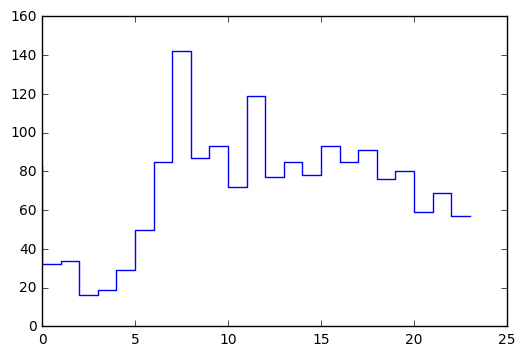

In [74]:
plt.step(br_hr.index, br_hr.values)

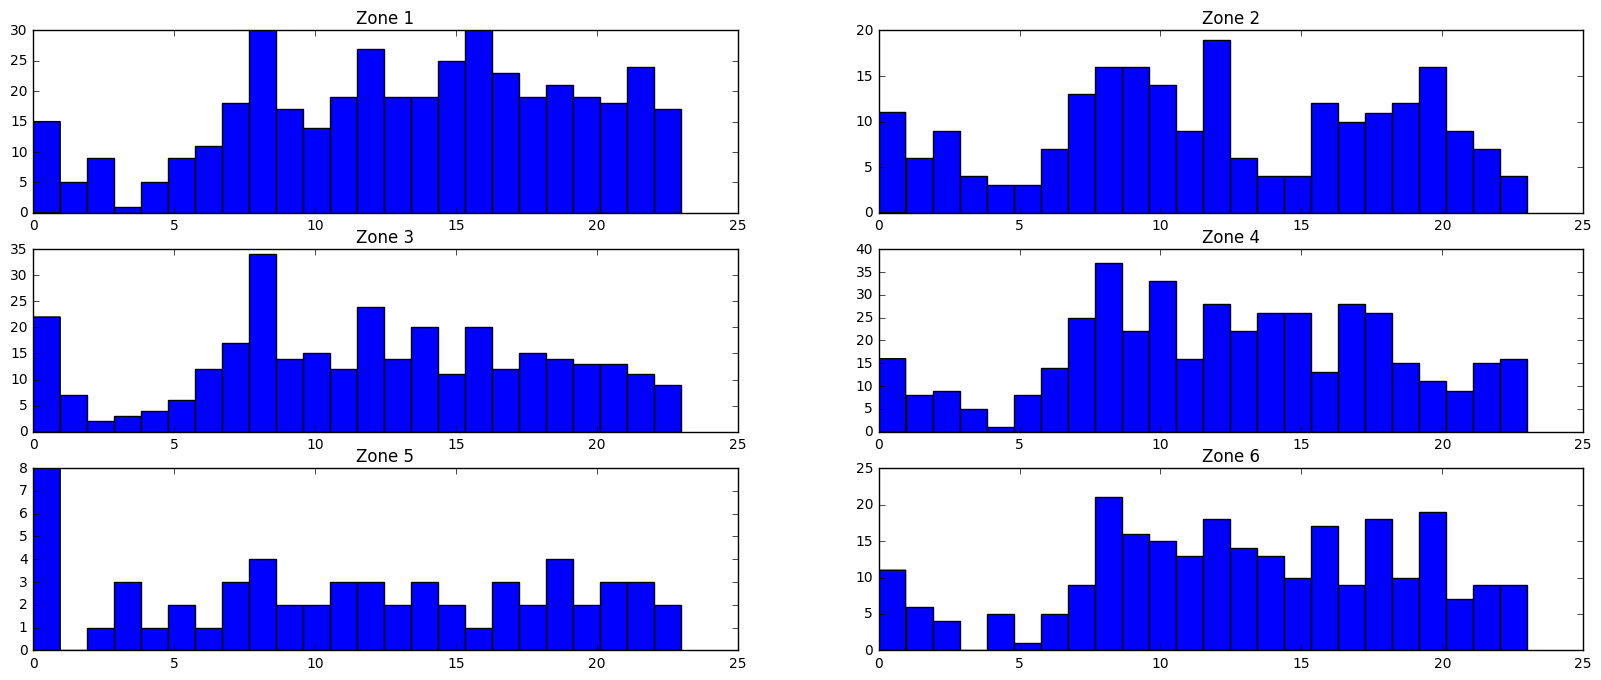

In [83]:
plt.figure(figsize=(20,8))
for z in range(1,7):
    plt.subplot(3,2,z)
    plt.title("Zone %d" % z)
    #brdf[brdf.Zone==z].hist(column='Hour', bins=24)
    plt.hist(brdf[brdf.Zone==z].Hour, bins=24)
plt.show()

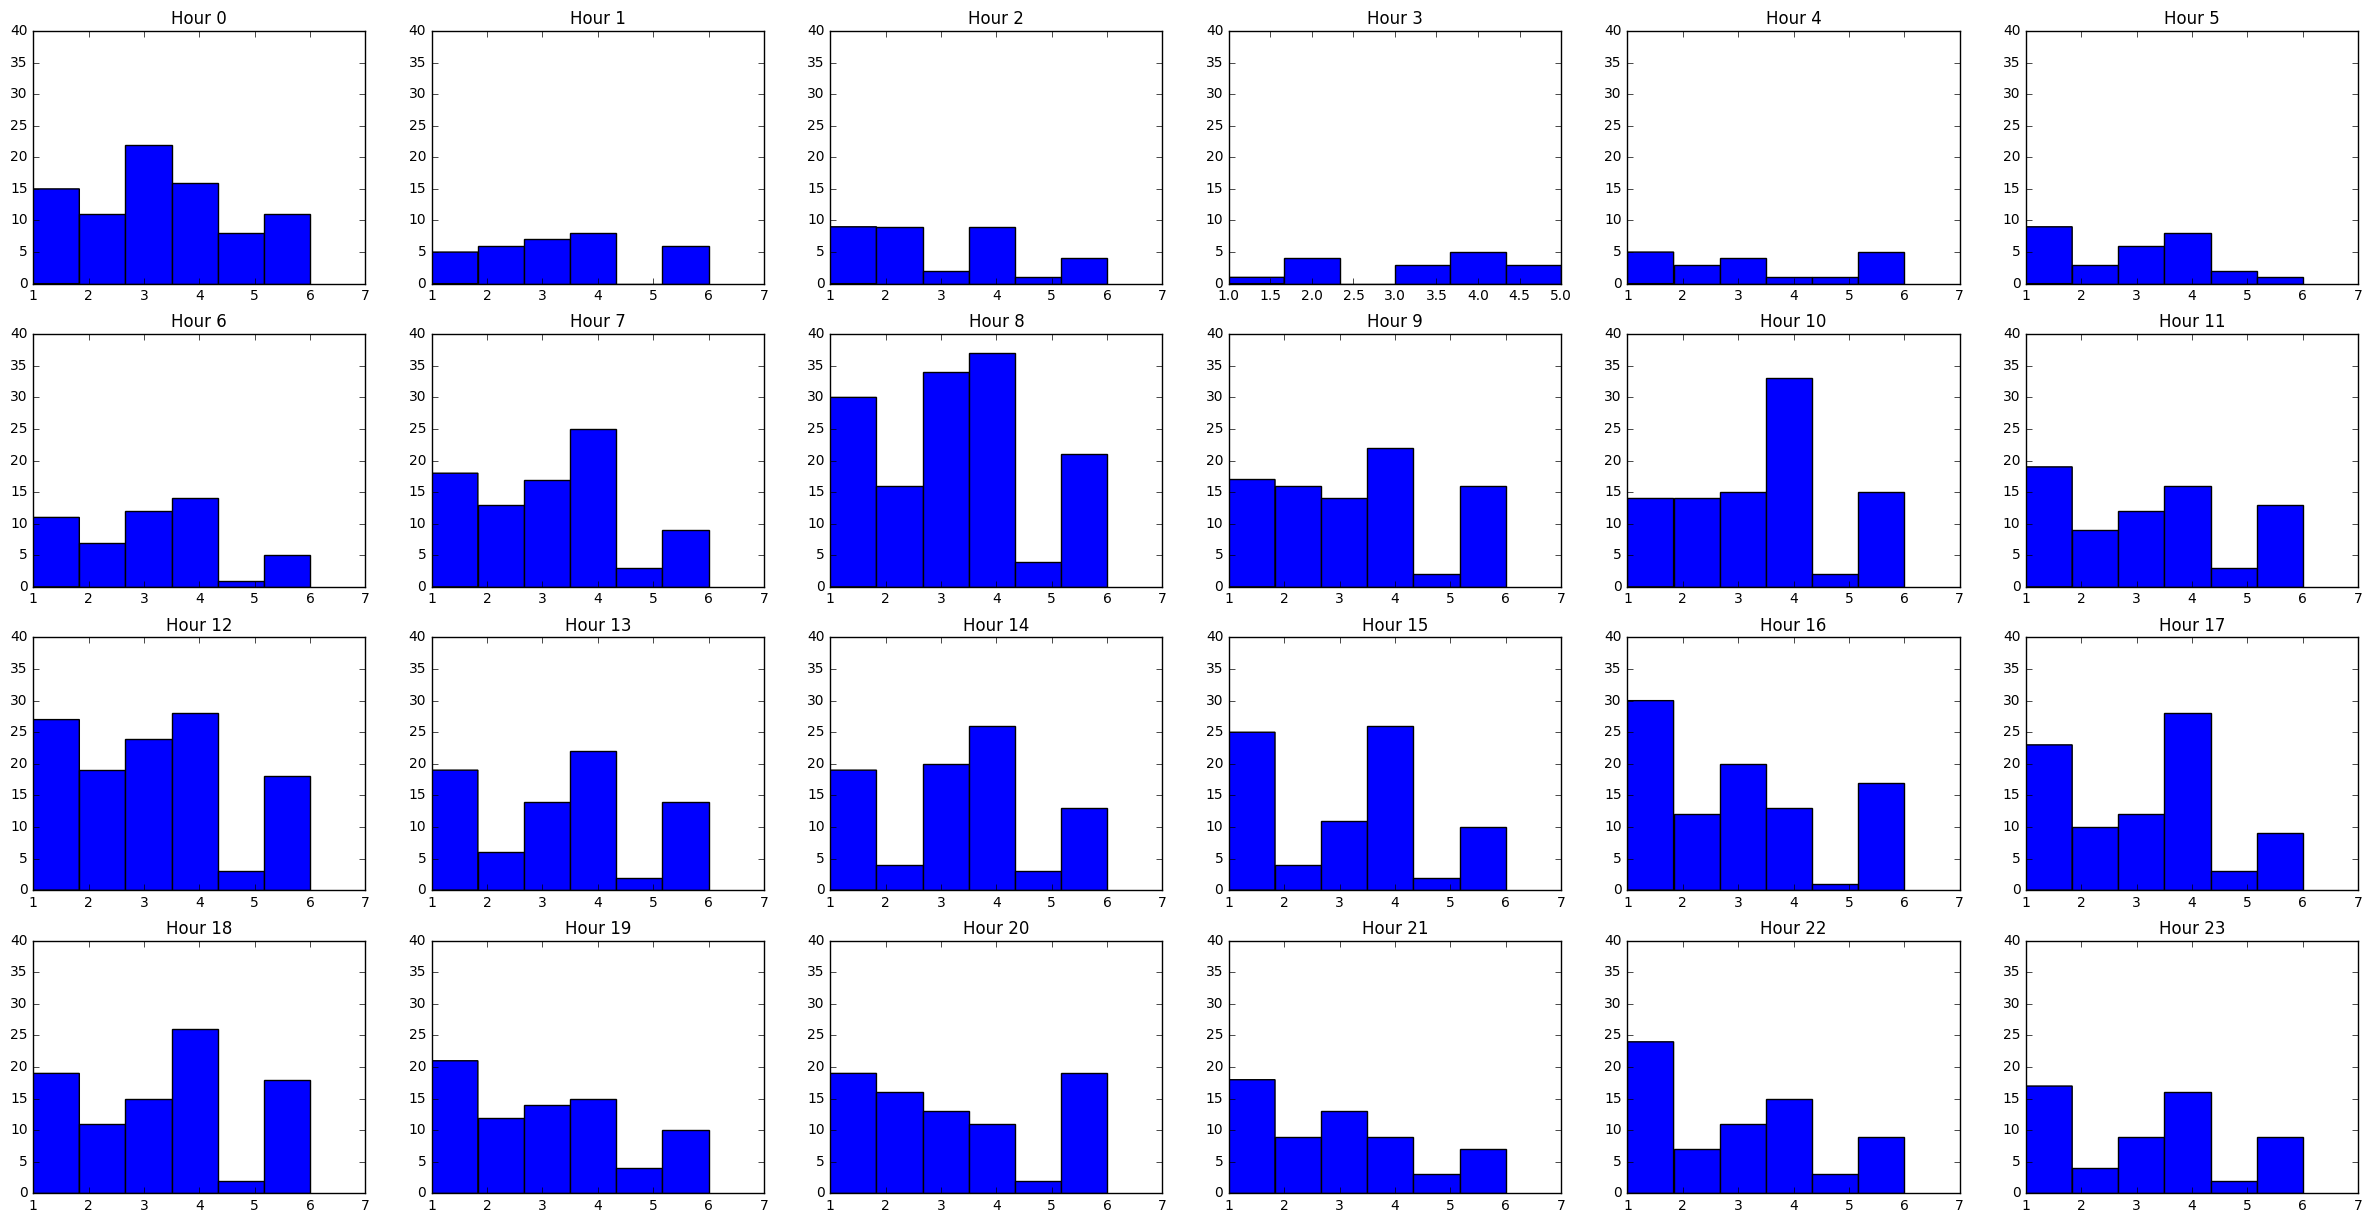

In [88]:
plt.figure(figsize=(30,15))
for h in range(24):
    plt.subplot(4,6,h+1)
    plt.title("Hour %d" % h)
    #brdf[brdf.Zone==z].hist(column='Hour', bins=24)
    plt.hist(brdf[brdf.Hour==h].Zone, bins=6)
    plt.ylim(0,40) ## sets limit on Y-axis
plt.show()

In [90]:
df['UC2 Literal'].unique()

array(['AGG ASSAULT', 'LARCENY-FROM VEHICLE', 'AUTO THEFT',
       'LARCENY-NON VEHICLE', 'ROBBERY-PEDESTRIAN', 'BURGLARY-NONRES',
       'BURGLARY-RESIDENCE', 'ROBBERY-COMMERCIAL', 'RAPE',
       'ROBBERY-RESIDENCE', 'HOMICIDE'], dtype=object)

In [92]:
df.groupby(['UC2 Literal', 'Zone']).offense_id.count()

UC2 Literal          Zone
AGG ASSAULT          1       397
                     2        96
                     3       338
                     4       309
                     5       140
                     6       114
                     7         2
AUTO THEFT           1       336
                     2       382
                     3       455
                     4       421
                     5       255
                     6       231
                     7         5
BURGLARY-NONRES      1        67
                     2       122
                     3        88
                     4        99
                     5        54
                     6        88
BURGLARY-RESIDENCE   1       414
                     2       225
                     3       324
                     4       429
                     5        60
                     6       259
HOMICIDE             1        15
                     2         6
                     3        14
                 

In [93]:
df['dayofweek'] = df.occur_dt.map(lambda d: d.dayofweek)

In [97]:
df.groupby(['UC2 Literal','dayofweek']).offense_id.count()

UC2 Literal          dayofweek
AGG ASSAULT          0.0          189
                     1.0          188
                     2.0          181
                     3.0          178
                     4.0          216
                     5.0          205
                     6.0          239
AUTO THEFT           0.0          276
                     1.0          269
                     2.0          294
                     3.0          268
                     4.0          275
                     5.0          374
                     6.0          329
BURGLARY-NONRES      0.0           80
                     1.0           66
                     2.0           76
                     3.0           74
                     4.0           62
                     5.0           82
                     6.0           78
BURGLARY-RESIDENCE   0.0          250
                     1.0          260
                     2.0          227
                     3.0          252
                   

In [58]:
brdf.apply(lambda r: str(r.location)+', '+str(r.npu), axis=1)

16               2232 DUNSEATH AVE NW, D
25                   454 OAK DRIVE SE, Z
26               2130 SOUTHWOOD CV SW, P
41             3901 CAMPBELLTON RD SW, P
77                    904 TIFT AVE SW, V
87             5110 ARBOR GATES DR NE, B
92                     708 JETT ST NW, L
99                   87 E LAKE TER SE, O
118               266 JOSEPHINE ST NE, N
121           870 MAYSON TURNER RD NW, L
132                775 ARGONNE AVE NE, E
135                3247 ROSWELL RD NE, B
141           445 CLEVELAND AVENUE SE, Z
149            2512 CAMPBELLTON RD SW, R
177             985 BUCKINGHAM CIR NW, A
198                  1041 STATE ST NW, E
202                    899 PARK ST SW, T
232            1870 CAMPBELLTON RD SW, R
236                 1935 ALISON CT SW, R
251                 58 SHERIDAN DR NE, B
260              1660 PEACHTREE ST NW, E
277      262 ARTHUR LANGFORD JR PL SW, Y
289               370 NORTHSIDE DR NW, L
361                  600 GARSON DR NE, B
377             

In [60]:
brdf.apply(np.min, axis=0)

MI_PRINX                              7652723
offense_id                          160821939
rpt_date                           01/01/2017
occur_date                         01/01/2016
occur_time                           00:00:00
poss_date                          01/01/2017
poss_time                            00:00:00
beat                                      101
apt_office_prefix                         inf
apt_office_num                            inf
location             1 PEACHTREE HILLS AVE NE
MinOfucr                                  511
MinOfibr_code                            2202
dispo_code                                inf
MaxOfnum_victims                            0
Shift                                     Day
Avg Day                                   Fri
loc_type                                    2
UC2 Literal                BURGLARY-RESIDENCE
neighborhood                              inf
npu                                       inf
x                                 

In [ ]:
df.occur_dt.map(lambda d: d.year).unique()

In [ ]:
df['Year'] = df.occur_dt.map(lambda d: d.year)
df2 = df[(df.Year>=2010) & (df.Year<=2017)]
df2.shape, df.shape

# Descriptive Statistics
https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

# Time Series
- https://pandas.pydata.org/pandas-docs/stable/timeseries.html
- https://pandas.pydata.org/pandas-docs/stable/api.html#id10

In [ ]:
df_LarcenyFromVehicle = df2[(df2['UC2 Literal']=='LARCENY-FROM VEHICLE')&(df2.Year==2017)].copy()
agr_LarcenyFromVehicle = df_LarcenyFromVehicle.set_index('occur_dt').resample('W').offense_id.count()
agr_LarcenyFromVehicle

In [ ]:
df_LarcenyFromVehicle["Hour"] = df_LarcenyFromVehicle.occur_dt.map(lambda d: d.hour)

In [ ]:
df_LarcenyFromVehicle.groupby("Hour").offense_id.count()

In [ ]:
hourly = df_LarcenyFromVehicle.resample('H', on='occur_dt').offense_id.count()

In [ ]:
hourly.reset_index().occur_dt.map(lambda d: d.week)

In [ ]:
df3 = pd.DataFrame({"N": hourly})
##df3['Day'] = df3.reset_index().occur_dt ##.map(lambda d: d.day)
df3

In [ ]:
ls

# Plotting
The Pandas package provides a number of plotting features. Let's try them out.
- https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html


In [ ]:
fig = plt.figure(figsize=(10,6)) # 10inx10in
#plt.plot(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'])
plt.scatter(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'], marker='x')
plt.scatter(resdf['BURGLARY-NONRES'].index, resdf['BURGLARY-NONRES'], marker='o')

plt.ylim(0, 500)
plt.title('BURGLARY-RESIDENCE')
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.savefig('BurglaryResidence_over_month.svg')
x = 1

In [ ]:
def getTheMonth(x):
    return x.month

df['occur_month'] = df['occur_ts'].map(getTheMonth)

In [ ]:
resdf = df.groupby(['UC2 Literal', 'occur_month']).offense_id.count()
fig = plt.figure(figsize=(10,6))
plt.scatter(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'], marker='x')
plt.ylim(0, 500)
plt.title('BURGLARY-RESIDENCE')
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('quiz3-burglary-residence.png')


# Seasonal Model

In [ ]:
fig = plt.figure(figsize=(40,30))
crime_types = crime_year.index.levels[0]
years = crime_year.index.levels[1]
for c in range(len(crime_types)):
    y_max = max(crime_year.loc[crime_types[c]])
    
    plt.subplot(4,3,c+1)
    plt.hlines(crime_year.loc[crime_types[c]].iloc[-1]*100/y_max, years[0], years[-1], linestyles="dashed", color="r")
    plt.bar(crime_year.loc[crime_types[c]].index, crime_year.loc[crime_types[c]]*100/y_max, label=crime_types[c], alpha=0.5)
    ##plt.legend()
    plt.ylim(0, 100)
    plt.xticks(years+0.4, [str(int(y)) for y in years], rotation=0, fontsize=24)
    plt.yticks([0,20,40,60,80,100], ['0%','20%','40%','60%','80%','100%'], fontsize=24)
    plt.title(crime_types[c], fontsize=30)
    None

In [ ]:
c = 3 ## 'BURGLARY-RESIDENCE'
resburglaries = crime_year_month.loc[crime_types[c]]
fig = plt.figure(figsize=(20,10))
for y in years:
    plt.plot(resburglaries.loc[y].index, resburglaries.loc[y], label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s"%crime_types[c], fontsize=20)
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
None

In [ ]:
c = 3 ## 'BURGLARY-RESIDENCE'
fig = plt.figure(figsize=(20,10))
for y in years:
    avg = resburglaries.loc[y].mean()
    std = resburglaries.loc[y].std()
    ##plt.hlines(avg, 1, 13, linestyle='dashed')
    plt.plot(resburglaries.loc[y].index, (resburglaries.loc[y]-avg)/std, label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s (normalized)"%crime_types[c], fontsize=20)
plt.xticks(list(range(1,13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
plt.ylabel("Standard deviations $\sigma_y$")
None